In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('./data/ThoraricSurgery3.csv', delimiter=',')
X = data[:,0:16]
y = data[:,16]

In [3]:
print(X.shape)
print(y.shape) # y축 타겟은 0, 1 벡터 형식으로들어가야함

(470, 16)
(470,)


### 모델 만들기

In [37]:
model = keras.Sequential() # 객체 생성

model.add(keras.layers.Dense(units = 30, input_dim = 16, activation = 'relu'))
# units = hidden 노드가 30개
# input_dim = x가 16개

model.add(keras.layers.Dense(units = 1, activation ='sigmoid')) # units = output 노드 1개

model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 30)                510       
                                                                 
 dense_61 (Dense)            (None, 1)                 31        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


### 모델 실행

In [39]:
## selecting parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## learning process
history = model.fit(X, y, epochs=100, batch_size=10) # 전체 470개가 있는데 10개씩 나눠서 하니까 47번, 이걸 다하면 1 에포크임

# loss = 학습하기 위한 손실 함수
# optimizer = adam, learning rate를 수정
# metrics = target이 0 또는 1이기 때문에 정확도 체크

Epoch 1/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.8511
Epoch 2/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.8511
Epoch 3/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.8511
Epoch 4/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8511
Epoch 5/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.8511
Epoch 6/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4459 - accuracy: 0.8511
Epoch 7/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.8511
Epoch 8/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.8511
Epoch 9/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.8511
Epoch 10/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4221 - accuracy: 0.8511
Epoch 11/

C:\Users\Jasper\AppData\Local\Temp\ipykernel_10900\890149959.py:2: RuntimeWarning: invalid value encountered in log
  y = np.log(x)
C:\Users\Jasper\AppData\Local\Temp\ipykernel_10900\890149959.py:3: RuntimeWarning: invalid value encountered in log
  y1 = -np.log(x)
C:\Users\Jasper\AppData\Local\Temp\ipykernel_10900\890149959.py:4: RuntimeWarning: invalid value encountered in log
  y2 = -np.log(-x)
C:\Users\Jasper\AppData\Local\Temp\ipykernel_10900\890149959.py:5: RuntimeWarning: invalid value encountered in log
  y3 = -np.log(1-x)


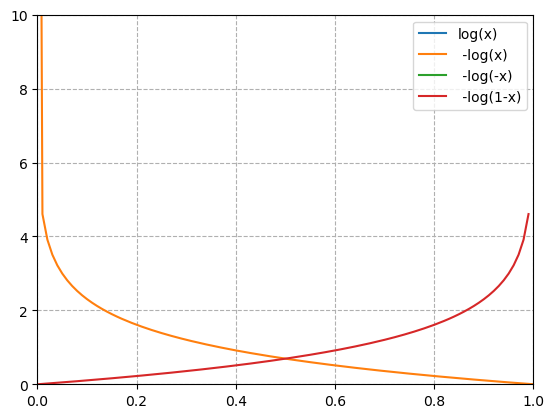

In [59]:
x = np.arange(-2,2,0.01)
y = np.log(x)
y1 = -np.log(x)
y2 = -np.log(-x)
y3 = -np.log(1-x)


fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
ax.plot(x, y, label='log(x)') 
ax.plot(x, y1, label=' -log(x)')  # y=-log(x) 주황
ax.plot(x, y2, label=' -log(-x)') 
ax.plot(x, y3, label=' -log(1-x)') # y=-log(1-x) 빨강
ax.grid(linestyle='--')
plt.legend()
plt.show()



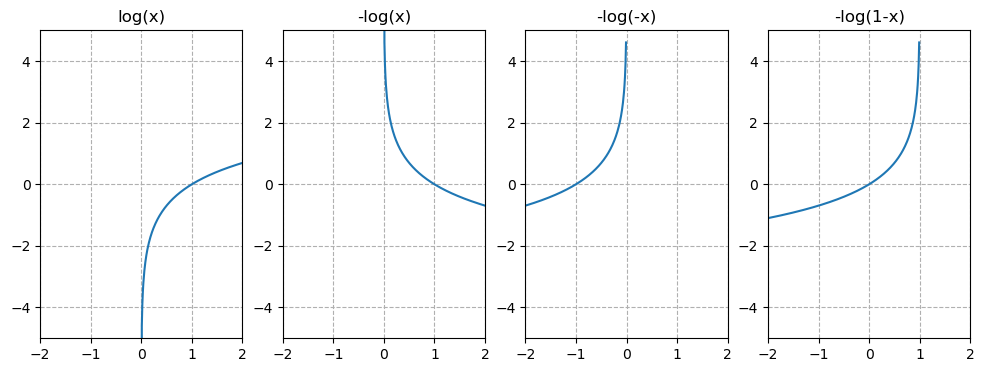

In [66]:
list_y = [y, y1, y2, y3]
list_name = ['log(x)', '-log(x)','-log(-x)','-log(1-x)']
fig, ax = plt.subplots(1,4, figsize=(12,4))
for i in range(len(list_y)):
    ax[i].plot(x, list_y[i])
    ax[i].grid(linestyle='--')
    ax[i].set_title(list_name[i])
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-5,5)
plt.show()


In [67]:
x = np.arange(2,10,2)
y = np.array([81,93,91,97])
print(x,y)

[2 4 6 8] [81 93 91 97]


2. 최소제곱법
- 분자: x와 y의 편차를 곱해서 합한 값
- 분모: x의 편차(각 값과 평균과의 차이)를 제곱해서 합한 값

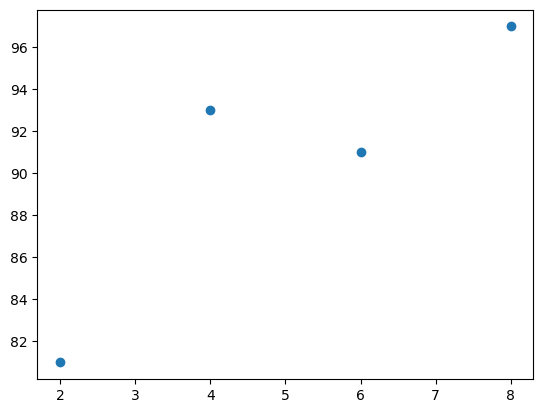

In [68]:
plt.scatter(x,y)
plt.show()

In [70]:
# 평균값 구하기
mx = np.mean(x)
my = np.mean(y)
print(mx,my)

5.0 90.5


In [73]:
for i in x:
    print(i)
    print((i-mx)**2)

2
9.0
4
1.0
6
1.0
8
9.0


In [78]:
# Sxx, Sxy
Sxx = sum([(i-mx)**2 for i in x]) # 분자
print(Sxx)
Sxy = sum([(i-mx)*(j-my) for i, j in zip(x,y)]) # 분모
print(Sxy)

20.0
46.0


In [79]:
# slope, intercept
slope = Sxy / Sxx
intercept = my - slope * mx

print(slope) # theta 1, 기울기
print(intercept) # tehta 0, y 절편 b

2.3
79.0


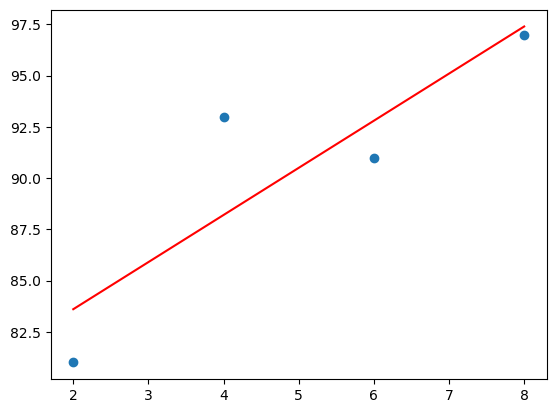

In [81]:
x_ = np.arange(2,9)
y_hat = intercept + slope * x_

plt.scatter(x,y)
plt.plot(x_, y_hat, 'r')
plt.show()


- 평균 제곱 오차(MSE): 적은게 좋음

In [84]:
mse = 0
for i, j in zip(x,y):
    predicted = slope*i + intercept
    mse += (j - predicted)**2

print(round(mse/len(x),2)) # 에러의 제곱
print(np.sqrt(round(mse/len(x),2))) # root

8.3
2.8809720581775866
